# Ward Linkage Clustering – Spotify Dataset Implementation Notebook

This notebook implements **Agglomerative Hierarchical Clustering with Ward linkage** on the **Spotify Tracks Dataset** for the CS6140 Group Problem Set #1 & #2.

It is organized to satisfy the *implementation* requirements of the assignment:
- data preprocessing for a real-world dataset  
- dimensionality reduction  
- Ward linkage clustering  
- visualisation (dendrograms + 2D PCA scatterplots)  
- cluster validation with multiple internal metrics



## 1. Dataset Selection and Justification

I use **a real-world, unlabeled dataset** that is suitable for clustering:

**Spotify Tracks Dataset (dataset.csv) – Kaggle**
   - Rows correspond to individual tracks.
   - Features are numerical audio descriptors such as loudness, tempo and valence.
   - This dataset is also naturally unlabeled, and clustering can group tracks by similar musical/ acoustic characteristics.

Because the Spotify dataset is composed entirely of **continuous audio descriptors** (e.g., loudness, tempo, energy, valence), it naturally matches the assumptions of Ward linkage.  
Ward linkage operates on **Euclidean distance** and is most effective when features are numeric and scaled, making it well-suited for clustering high-dimensional acoustic feature vectors.

In [1]:
import kagglehub

# Download Spotify dataset
spotify_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
print("Spotify dataset path:", spotify_path)


Using Colab cache for faster access to the '-spotify-tracks-dataset' dataset.
Spotify dataset path: /kaggle/input/-spotify-tracks-dataset


## 2. Spotify Tracks Dataset – Preprocessing, Sampling, PCA and Ward Clustering

### 2.1 Preprocessing
For the Spotify tracks dataset:

- I read `dataset.csv` from the KaggleHub path.  
- Only **numeric columns** are kept for clustering to ensure Euclidean distance is meaningful.  
- Rows with missing values are dropped.
- Features are **standardised** using `StandardScaler` so that all variables are on a comparable scale when using Euclidean distance in Ward linkage.

### 2.2 Sampling for Dendrogram Visualisation
The Spotify dataset contains many thousands of tracks.  
A full dendrogram has time and memory complexity of roughly **O(n²)**, which is impractical for large `n`.

To make the notebook easy to run, I:
- randomly **sample 2000 tracks** (`X.sample(n=2000, random_state=42)`)  
- perform Ward linkage and dendrogram plotting on this subset.

This still provides a representative picture of the hierarchical structure while avoiding crashes in constrained environments such as Colab.

### 2.3 Ward Linkage Clustering and Validation
I again run `AgglomerativeClustering` with `linkage='ward'` (and the same `n_clusters`) on the standardised sample, and compute:

- Silhouette Score  
- Davies–Bouldin Index  
- Calinski–Harabasz Index  

These scores can be directly compared with those from the other clustering experiments in this assignment to discuss how Ward linkage behaves on different types of data.

### 2.4 PCA Visualisation
As before, I apply **PCA with 2 components** to the standardised Spotify features and:

- plot a dendrogram for the sampled 2000 tracks, and  
- produce a 2D PCA scatter plot coloured by the Ward cluster assignments.

Together, these visualisations show both the hierarchical structure and the final partition induced by Ward linkage.

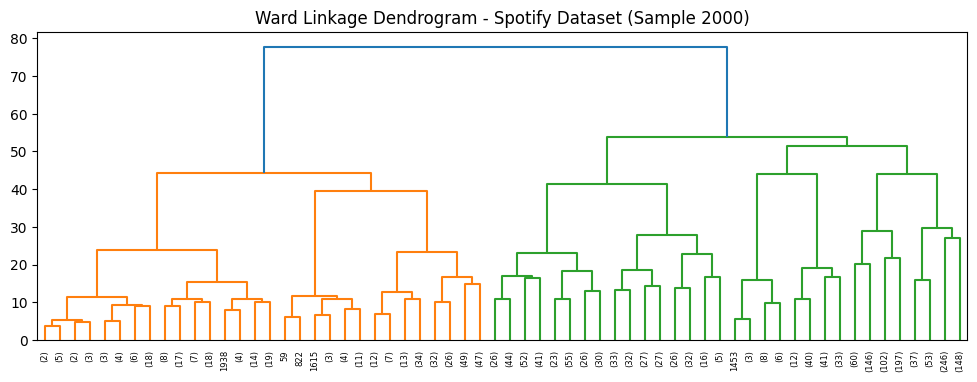


--- Spotify Dataset (Ward on 2000 Sample) ---
Silhouette Score: 0.0812
Davies-Bouldin Index: 2.518
Calinski-Harabasz Index: 145.9959


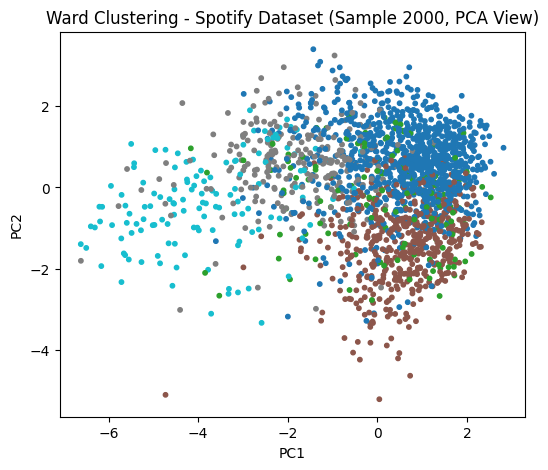

In [2]:
# ----------------------------
# WARD LINKAGE - SPOTIFY DATA
# ----------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load Spotify data
spotify_csv = spotify_path + "/dataset.csv"
spotify = pd.read_csv(spotify_csv)

# Keep only numeric columns
num_cols = spotify.select_dtypes(include=[np.number]).columns
X = spotify[num_cols].dropna()

# ---- Critical Step: Sample to prevent RAM crash ----
X_sample = X.sample(n=2000, random_state=42)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Dendrogram (safe)
plt.figure(figsize=(12, 4))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Ward Linkage Dendrogram - Spotify Dataset (Sample 2000)")
plt.show()

# Choose k=5
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = cluster_model.fit_predict(X_scaled)

# Evaluation
sil = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
ch = calinski_harabasz_score(X_scaled, labels)

print("\n--- Spotify Dataset (Ward on 2000 Sample) ---")
print("Silhouette Score:", round(sil, 4))
print("Davies-Bouldin Index:", round(dbi, 4))
print("Calinski-Harabasz Index:", round(ch, 4))

# PCA plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Ward Clustering - Spotify Dataset (Sample 2000, PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
